In [1]:
import sys
sys.path.insert(0, '../')

from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale

In [3]:
outliers_percentage = 0.35
inliers = 300
outliers = int(inliers * outliers_percentage)


data = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[.3, .3],
                  n_samples=inliers, random_state=0)[0]


data = scale(data)
data = np.concatenate([data, 
                       (np.random.rand(outliers, 2)-.5)*4.])


som = MiniSom(2, 1, data.shape[1], sigma=1, learning_rate=0.5,
              neighborhood_function='triangle', random_seed=10)


som.train_batch(data, 100, verbose=True)  # random training

 [ 100 / 100 ] 100% 0.00022 it/s

../minisom.py:117: UserWarning: Warning:sigma may be too high for the dimension of the map.
  warn('Warning:sigma may be too high for the dimension of the map.')


In [4]:
quantization_errors = np.linalg.norm(som.quantization(data) - data, axis=1)
error_treshold = np.percentile(quantization_errors, 
                               100*(1-outliers_percentage)+5)
is_outlier = quantization_errors > error_treshold

Text(0, 0.5, 'frequency')

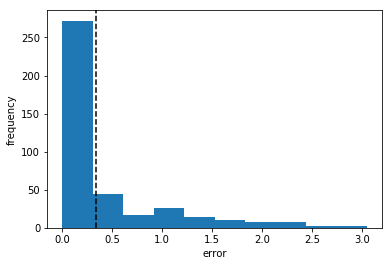

In [5]:
plt.hist(quantization_errors)
plt.axvline(error_treshold, color='k', linestyle='--')
plt.xlabel('error')
plt.ylabel('frequency')

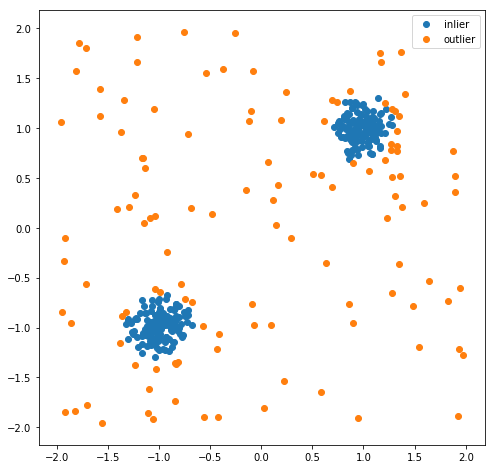

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(data[~is_outlier, 0], data[~is_outlier, 1],
            label='inlier')
plt.scatter(data[is_outlier, 0], data[is_outlier, 1],
            label='outlier')
plt.legend()
plt.savefig('resulting_images/som_outliers_detection.png')
plt.show()

In [7]:
from sklearn.datasets import make_circles
data = make_circles(noise=.1, n_samples=inliers, random_state=0)[0]
data = scale(data)
data = np.concatenate([data, 
                       (np.random.rand(outliers, 2)-.5)*4.])


som = MiniSom(5, 5, data.shape[1], sigma=1, learning_rate=0.5,
              neighborhood_function='triangle', random_seed=10)


som.train_batch(data, 100, verbose=True)  
quantization_errors = np.linalg.norm(som.quantization(data) - data, axis=1)
error_treshold = np.percentile(quantization_errors, 
                               100*(1-outliers_percentage)+5)
is_outlier = quantization_errors > error_treshold

 [ 100 / 100 ] 100% 0.00060 it/s

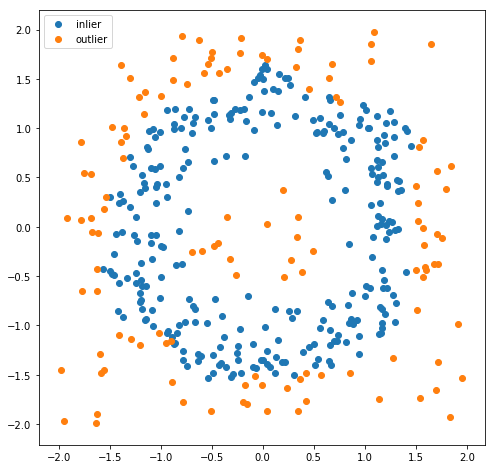

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(data[~is_outlier, 0], data[~is_outlier, 1],
            label='inlier')
plt.scatter(data[is_outlier, 0], data[is_outlier, 1],
            label='outlier')
#weights = som._weights.reshape(5*5, 2)
#plt.scatter(weights[:, 0], weights[:,1],
#            marker='+', s=320, c='g', label='weights')
plt.legend()
plt.savefig('resulting_images/som_outliers_detection_circle.png')
plt.show()